This is a data analysis project - it uses stock market prices of 5 companies between 2014-01-02 and 2019-08-23.  
  Companies:  
    - Microsoft **MSFT**  
    - Apple **AAPL**  
    - Google **GOOGL**  
    - Amazon **AMZN**  
    - Meta, formely Facebook **FB**  

##### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tech_url = 'https://andybek.com/pandas-tech'

In [3]:
tech = pd.read_csv(tech_url)

In [4]:
aapl = tech.loc[tech.name=='AAPL', 'close'].rename('Apple')
amzn = tech.loc[tech.name=='AMZN', 'close'].rename('Amazon')
fb = tech.loc[tech.name=='FB', 'close'].rename('Facebook')
googl = tech.loc[tech.name=='GOOGL', 'close'].rename('Google')
msft = tech.loc[tech.name=='MSFT', 'close'].rename('Microsoft')

##### Data review

In [5]:
tech.head()

,date,month,year,day,name,open,close,high,low,volume,volume_type
0,2014-01-02,1,2014,2,FB,54.86,54.71,55.22,54.19,43257622,medium
1,2014-01-02,1,2014,2,AAPL,79.38,79.02,79.58,78.86,8398851,low
2,2014-01-02,1,2014,2,GOOGL,557.73,556.56,558.88,554.13,1822719,medium
3,2014-01-02,1,2014,2,MSFT,37.35,37.16,37.40,37.10,30643745,medium
4,2014-01-02,1,2014,2,AMZN,398.80,397.97,399.36,394.02,2140246,medium


Data seems pretty good, yet we can remove the index and replace it with something more meaningful.   
Let's create an index set of **date** name **company name**.

In [6]:
tech.set_index(['date', 'name'], inplace=True)

In [7]:
tech.head(10)

month  year  day    open   close    high     low    volume  \
date       name                                                                
2014-01-02 FB         1  2014    2   54.86   54.71   55.22   54.19  43257622   
           AAPL       1  2014    2   79.38   79.02   79.58   78.86   8398851   
           GOOGL      1  2014    2  557.73  556.56  558.88  554.13   1822719   
           MSFT       1  2014    2   37.35   37.16   37.40   37.10  30643745   
           AMZN       1  2014    2  398.80  397.97  399.36  394.02   2140246   
2014-01-03 FB         1  2014    3   55.00   54.56   55.65   54.53  38287706   
           GOOGL      1  2014    3  557.50  552.50  558.47  552.47   1669229   
           MSFT       1  2014    3   37.20   36.91   37.22   36.60  31134795   
           AAPL       1  2014    3   79.00   77.28   79.10   77.20  14043410   
           AMZN       1  2014    3  398.29  396.44  402.71  396.22   2213512   

                 volume_type  
date       name               
2014-01-02 FB         medium  
           AAPL          low  
           GOOGL      medium  
           MSFT       medium  
           AMZN       medium  
2014-01-03 FB         medium  
           GOOGL      medium  
           MSFT       medium  
           AAPL          low  
           AMZN       medium

Looks better, yet order should be fixed:

In [8]:
tech.sort_index()

month  year  day     open    close     high      low  \
date       name                                                          
2014-01-02 AAPL       1  2014    2    79.38    79.02    79.58    78.86   
           AMZN       1  2014    2   398.80   397.97   399.36   394.02   
           FB         1  2014    2    54.86    54.71    55.22    54.19   
           GOOGL      1  2014    2   557.73   556.56   558.88   554.13   
           MSFT       1  2014    2    37.35    37.16    37.40    37.10   
...                 ...   ...  ...      ...      ...      ...      ...   
2019-08-23 AAPL       8  2019   23   209.43   202.64   212.05   201.00   
           AMZN       8  2019   23  1793.03  1749.62  1804.90  1745.23   
           FB         8  2019   23   180.84   177.75   183.13   176.66   
           GOOGL      8  2019   23  1185.17  1153.58  1195.67  1150.00   
           MSFT       8  2019   23   137.19   133.39   138.35   132.80   

                    volume volume_type  
date       name                         
2014-01-02 AAPL    8398851         low  
           AMZN    2140246      medium  
           FB     43257622      medium  
           GOOGL   1822719      medium  
           MSFT   30643745      medium  
...                    ...         ...  
2019-08-23 AAPL   46882843      medium  
           AMZN    5277898      medium  
           FB     17331221      medium  
           GOOGL   1813141      medium  
           MSFT   38515386      medium  

[7105 rows x 9 columns]

Now let's assume we have the data in a format we want and no further preprocessing needs to be done.   
Let's analyze the data and check how prices changed across the years.

In [9]:
 grouped1 = tech.loc[:,['open','close','high','low','volume']].groupby('name').agg(['min', 'max','mean'])


In [10]:
grouped1

open                        close                         high  \
          min      max        mean     min      max        mean     min   
name                                                                      
AAPL    70.73   230.78  137.692512   71.40   232.07  137.733434   71.65   
AMZN   284.40  2038.11  935.246531  286.95  2039.51  934.792555  290.42   
FB      54.13   215.72  126.836692   53.53   217.50  126.874511   54.94   
GOOGL  499.24  1289.12  842.193821  497.06  1296.20  842.017903  500.28   
MSFT    34.71   141.50   70.237298   34.98   141.34   70.255053   35.88   

                               low                        volume             \
           max        mean     min      max        mean      min        max   
name                                                                          
AAPL    233.47  138.912357   70.51   229.78  136.498951   164346  189846255   
AMZN   2050.50  943.991281  284.00  2013.00  924.754877    71678   23856060   
FB      218.62  128.142540   51.85   214.27  125.480070  5913066  169803668   
GOOGL  1296.97  849.227424  490.91  1271.71  834.383153   521141   12858136   
MSFT    141.68   70.821724   34.63   140.30   69.613469  7425603  202526536   

                     
               mean  
name                 
AAPL   3.629637e+07  
AMZN   4.241203e+06  
FB     2.763715e+07  
GOOGL  1.940146e+06  
MSFT   3.031351e+07

Okay, let's make it more readable and just analyszy close and volumes.   
Also let's round mean so it does not include exponential notation and rename some stuff.

In [11]:
grouped2 = tech.loc[:,['close','volume']].groupby('name').agg(['min', 'max','mean']).round(2) \
.rename({'close': 'Closing Price', 'volume': 'Volume'}, axis=1)

In [12]:
grouped2

Closing Price                    Volume                        
                min      max    mean      min        max         mean
name                                                                 
AAPL          71.40   232.07  137.73   164346  189846255  36296366.38
AMZN         286.95  2039.51  934.79    71678   23856060   4241203.19
FB            53.53   217.50  126.87  5913066  169803668  27637147.51
GOOGL        497.06  1296.20  842.02   521141   12858136   1940146.18
MSFT          34.98   141.34   70.26  7425603  202526536  30313506.00

Okay let's create another columms:   
First one with a % difference between opening and closing prices - **change**   
Second one with a volume x close price - **price_volume** [mld].

In [13]:
tech['price_volume'] = ((tech['close'] * tech['volume'])/1000000000).round(2)

In [14]:
tech['change'] = (tech['close'] - tech['open'])/tech['close']
tech['change'] = tech['change'].apply(lambda x: f'{x:.2f}%') # line to declare display output as %

In [15]:
max1 = tech.loc[:,['change']].groupby('name').agg(['max']) \
.sort_values(by=('change','max'), ascending = False) #\
#.rename({'change':'Maxumim growth % in one day', 'max':''}, axis=1)

In [16]:
max1

,change
,max
name,
AAPL,0.08%
AMZN,0.07%
FB,0.06%
GOOGL,0.05%
MSFT,0.05%


In [17]:
max2 = tech.loc[:,['price_volume']].groupby('name').agg(['max']) \
.sort_values(by=('price_volume','max'), ascending = False) \
.rename({'price_volume':'Close price * volume in one day', 'max':''}, axis=1)

In [18]:
max2

,Close price * volume in one day
,
name,
FB,29.93
AMZN,24.58
AAPL,20.95
MSFT,10.93
GOOGL,9.00


As you can see, Apple got the best result when it comes to one day growth of 0.08% of company's price   
while facebook has the biggest price*volume of close to 30 bilion dollars.

##### Visualize Data

In [19]:
plt.style.use('ggplot')

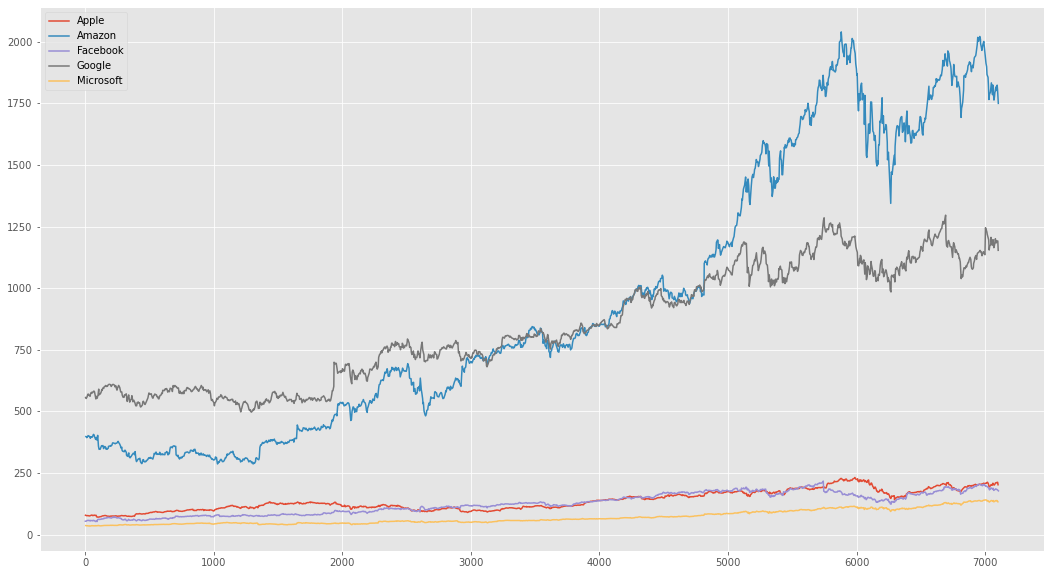

In [20]:
dfs = pd.concat([aapl,amzn,fb,googl,msft], axis=1)
dfs.plot(figsize=(18, 10));

It is not great in terms of readability, let's split the companies so each one gets its own graph and we can examine the scale and y axis more carefully.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

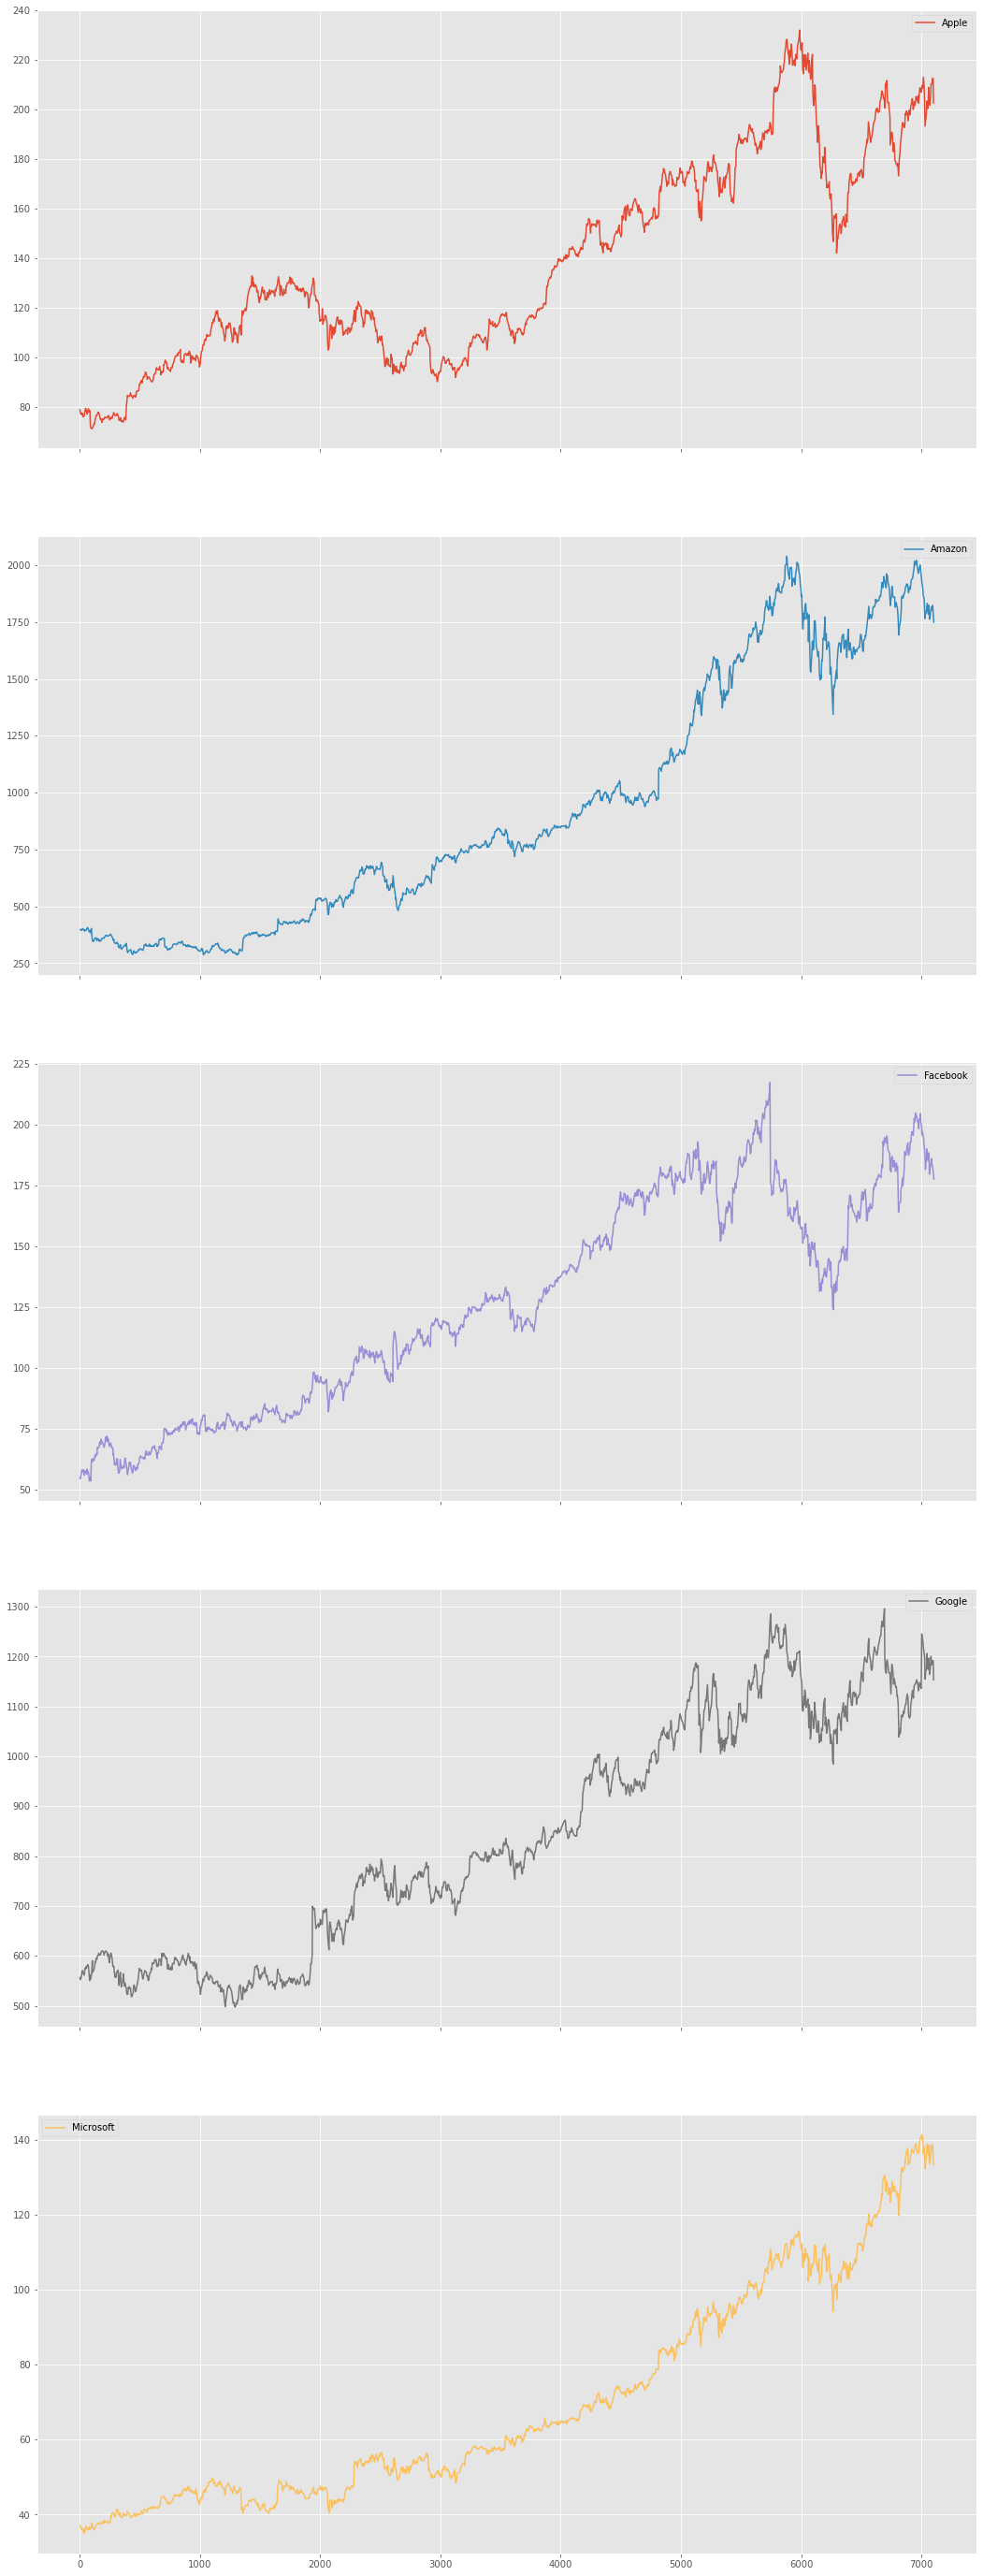

In [21]:
dfs.plot(subplots=True,figsize=(18, 50))

Of course this is a code sample and we can examin the data further.